In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression
- 가장 많이 쓰이는 metric으로는 MSE

### 정규 방정식
- norm equation
- 데이터가 많아질 수록 계산복잡도가 높아져 계산하는데 시간 소요가 큼!!

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

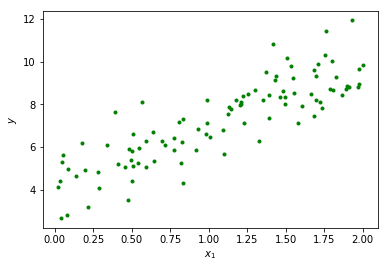

In [20]:
plt.plot(X, y, 'g.',)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.20765413],
       [2.8381915 ]])

In [7]:
# predict
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20765413],
       [9.88403712]])

<function matplotlib.pyplot.show(*args, **kw)>

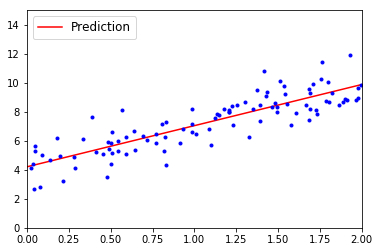

In [29]:
plt.plot(X_new, y_predict, 'r-', label='Prediction')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left', fontsize=12)

plt.show

In [11]:
# Using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('intercept is {}, coefficient is {}'.format(lin_reg.intercept_, lin_reg.coef_))
lin_reg.predict(X_new)

intercept is [4.20765413], coefficient is [[2.8381915]]


/Users/jinhong/miniconda3/envs/handson/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


array([[4.20765413],
       [9.88403712]])

## 경사하강법
- Gradient Descent
- minimize(cost function)

### Full Batch Gradient Descent

In [12]:
learning_rate  = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialize

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (learning_rate * gradients)

In [13]:
theta

array([[4.20765413],
       [2.8381915 ]])

### Stocastic Gradient Descent (SGD)
- 한 스텝에서 하나의 sample의 그래디언트 계산
- GD보다 빠름, 그러나 불안정
- 전역 최소값을 찾을 가능성은 GD보다 높음
- 그러나 값이 계속 튀기때문에 최종 전역 최소값이 아닐 수 있음
- 이를 해결하기 위한 방법으로는 학습을 시작할 땐 큰 학습률로 시작을 한 후 점점 학습률의 값을 작게 하는 방법이 있음

In [34]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_shedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_shedule(epoch * m + i)
        theta = theta - eta * gradients

In [35]:
theta

array([[4.25988123],
       [2.82389944]])

In [37]:
# Using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.19251394]), array([2.82641703]))

### Mini-Batch GD
- SGD보다 더 전역최소값에 가까운 결과를 낼 수 있음
- 지역최소에 빠지는 경우가 SGD보다 더 많음

In [38]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2,1)  # random initialization

t0, t1 = 5, 50
# t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

## 다항회귀(polynomial Regression)

In [40]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X +2 + np.random.randn(m, 1)

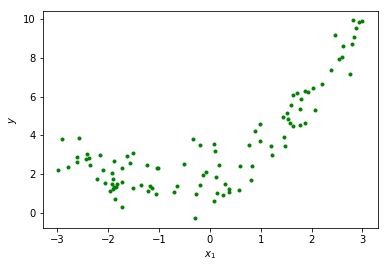

In [41]:
plt.plot(X, y, 'g.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([1.63866378]), array([1.        , 1.63866378, 2.68521899]))

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85540062]), array([[0.        , 1.03402617, 0.54053659]]))

In [46]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

Text(0,0.5,'y')

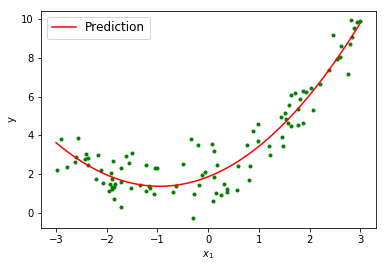

In [50]:
plt.plot(X, y, 'g.')
plt.plot(X_new, y_new, 'r', label='Prediction')
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('$x_1$')
plt.ylabel('y')

## 학습곡선
- 학습 정도가 overfitting & under fitting 되지 않았는지 확인하는 방법 중 하나

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train Sets')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Sets')
    plt.legend(loc='upper right')
    plt.xlabel('Train Sets Size')
    plt.ylabel('RMSE')
    plt.ylim(0, 5)

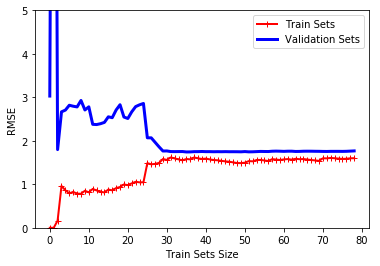

In [67]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

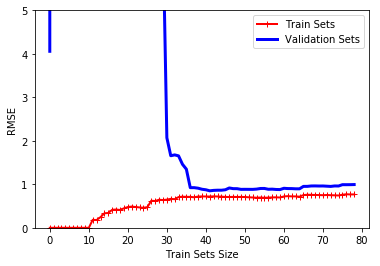

In [69]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## 모델 규제

### 릿지 회귀

In [71]:
# 정규 방정식
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.1418203]])

In [74]:
# SGD
sgd_reg = SGDRegressor(max_iter=5, penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.26949093])

### 라쏘 회귀

In [75]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # == SGDRegressor(penalty='l1')
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09813653])

### 엘라스틱 넷
- Ridge와 Lasso의 절충

In [76]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09696538])

### 조기 종료(Early stopping)
- 학습 데이터셋의 오차와 검증 데이터셋의 오차를 비교했을 때,  
학습 데이터셋의 오차는 계속 줄어드는데 검증 데이터셋의 오차가 감소하다가 증가하기 시작하면 학습을 종료함

In [77]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)


poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimun_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
if val_error < minimun_val_error:
    minimun_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## 로지스틱 회귀

### 확률 추정